#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

In [46]:
import pandas as pd
import numpy as np 
titanic=pd.read_csv('data/titanic.csv')
titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


array([[<AxesSubplot:xlabel='pclass', ylabel='pclass'>,
        <AxesSubplot:xlabel='age', ylabel='pclass'>,
        <AxesSubplot:xlabel='sibsp', ylabel='pclass'>,
        <AxesSubplot:xlabel='parch', ylabel='pclass'>,
        <AxesSubplot:xlabel='fare', ylabel='pclass'>,
        <AxesSubplot:xlabel='survived', ylabel='pclass'>],
       [<AxesSubplot:xlabel='pclass', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sibsp', ylabel='age'>,
        <AxesSubplot:xlabel='parch', ylabel='age'>,
        <AxesSubplot:xlabel='fare', ylabel='age'>,
        <AxesSubplot:xlabel='survived', ylabel='age'>],
       [<AxesSubplot:xlabel='pclass', ylabel='sibsp'>,
        <AxesSubplot:xlabel='age', ylabel='sibsp'>,
        <AxesSubplot:xlabel='sibsp', ylabel='sibsp'>,
        <AxesSubplot:xlabel='parch', ylabel='sibsp'>,
        <AxesSubplot:xlabel='fare', ylabel='sibsp'>,
        <AxesSubplot:xlabel='survived', ylabel='sibsp'>],
       [<AxesSubplot:xlabel=

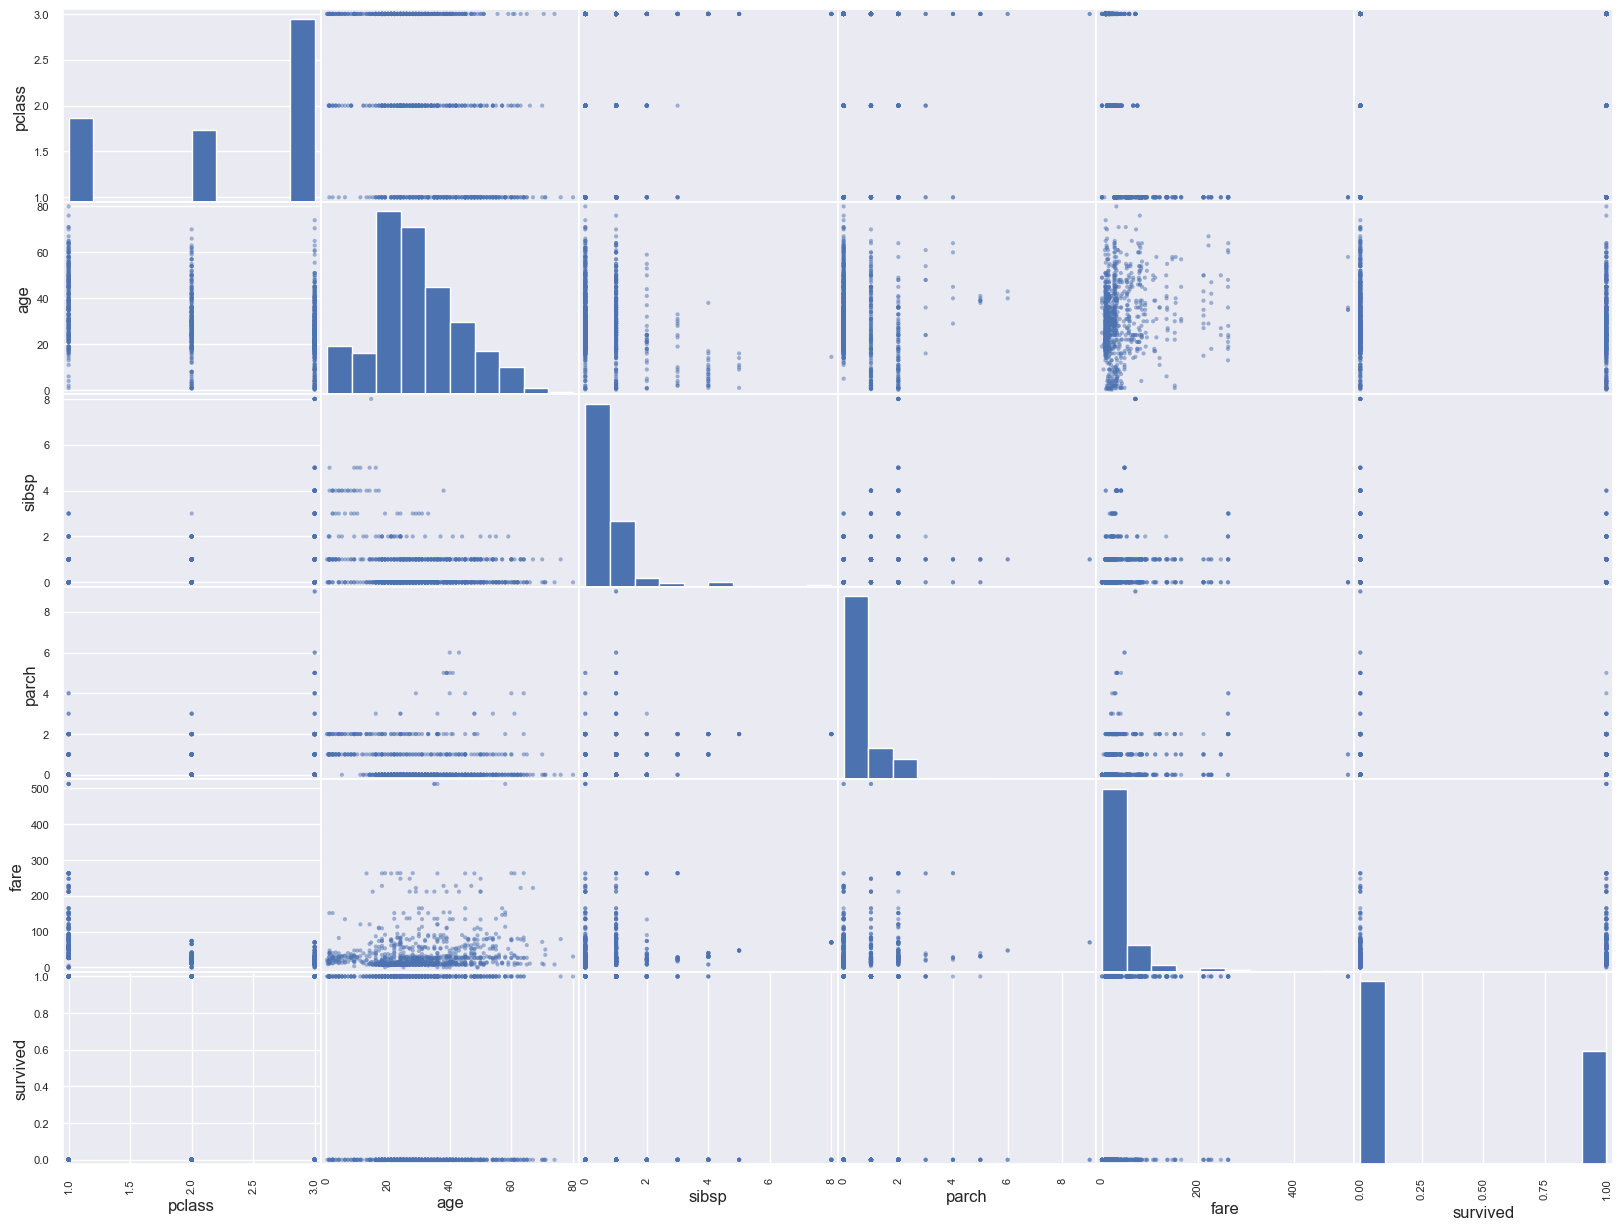

In [13]:
pd.plotting.scatter_matrix(titanic,figsize=(20,15))

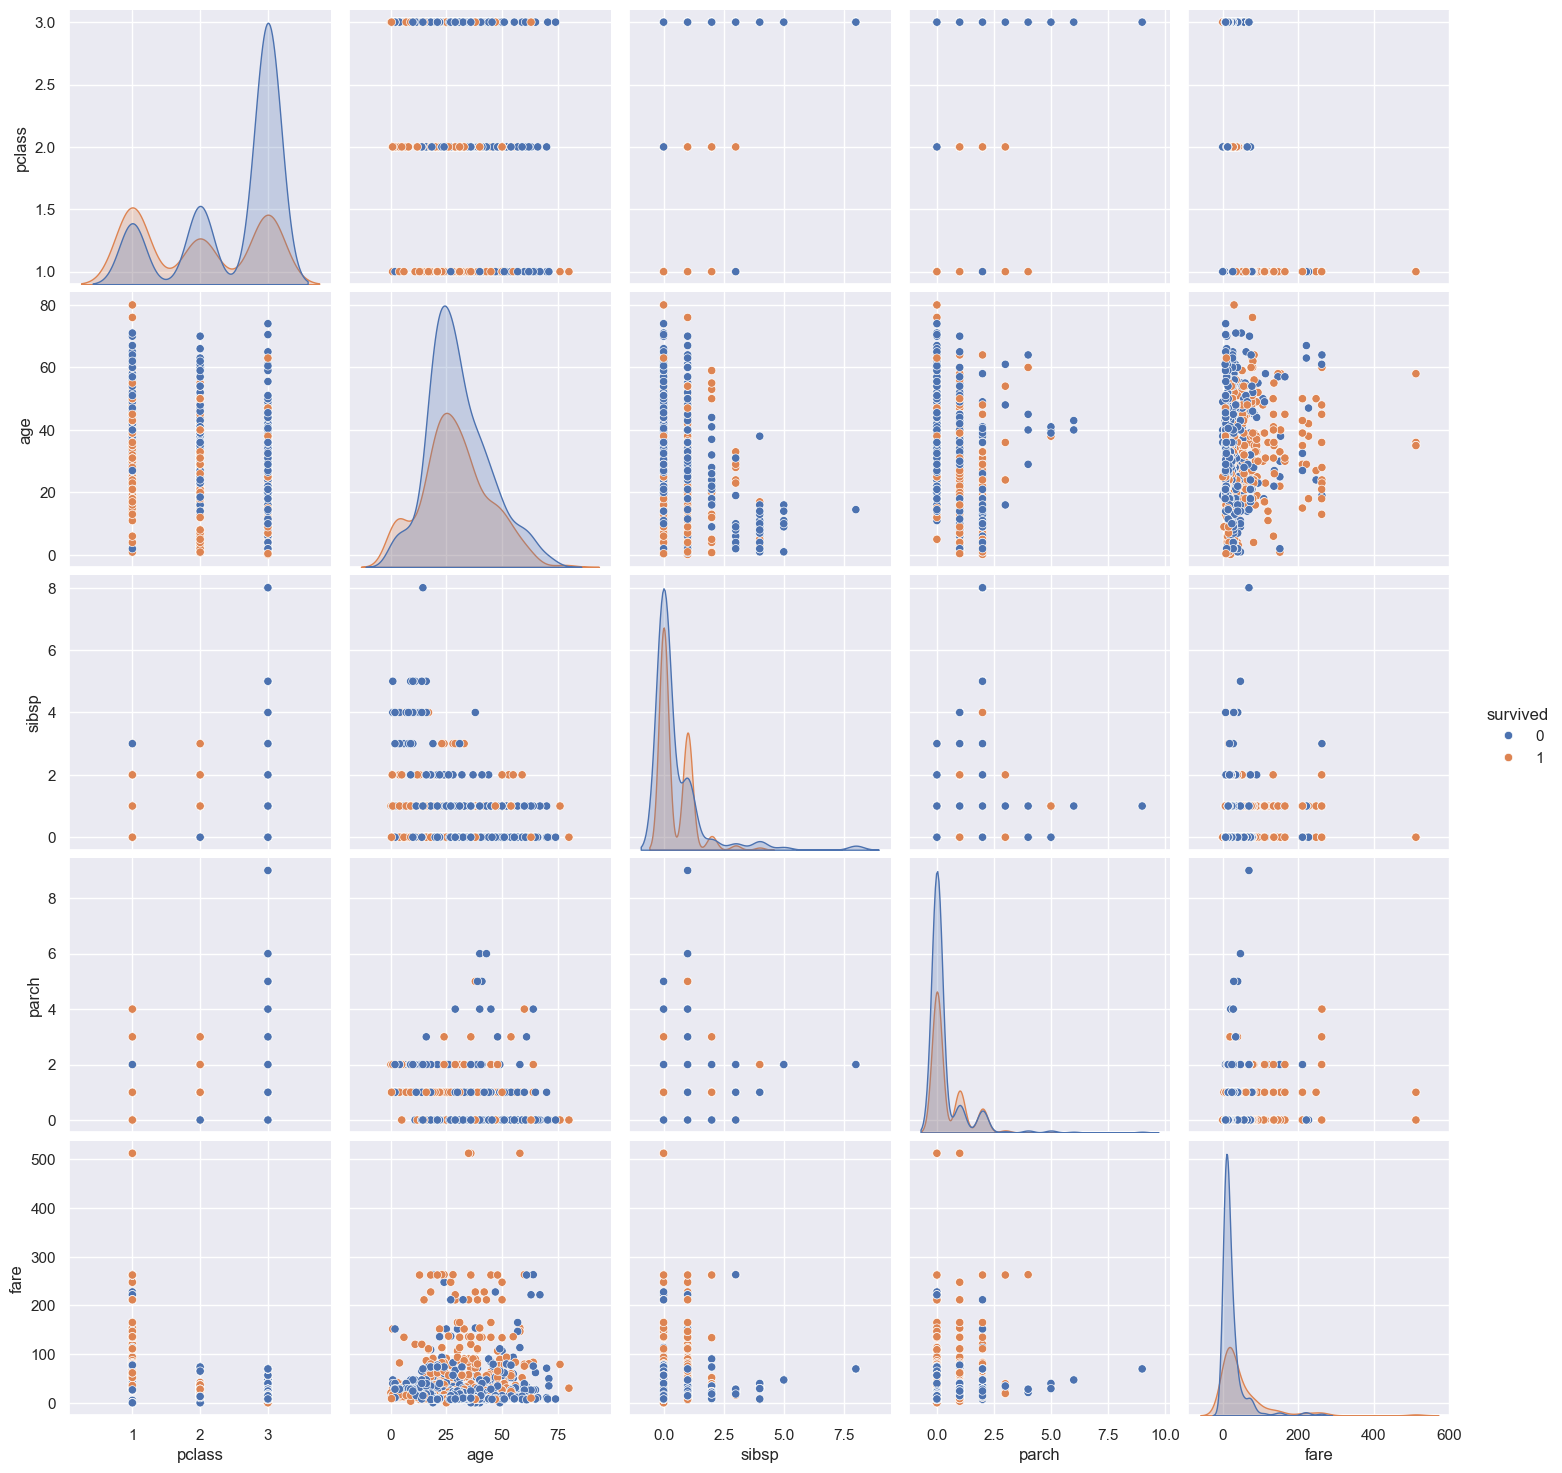

In [16]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(titanic, hue='survived', height=3)

#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

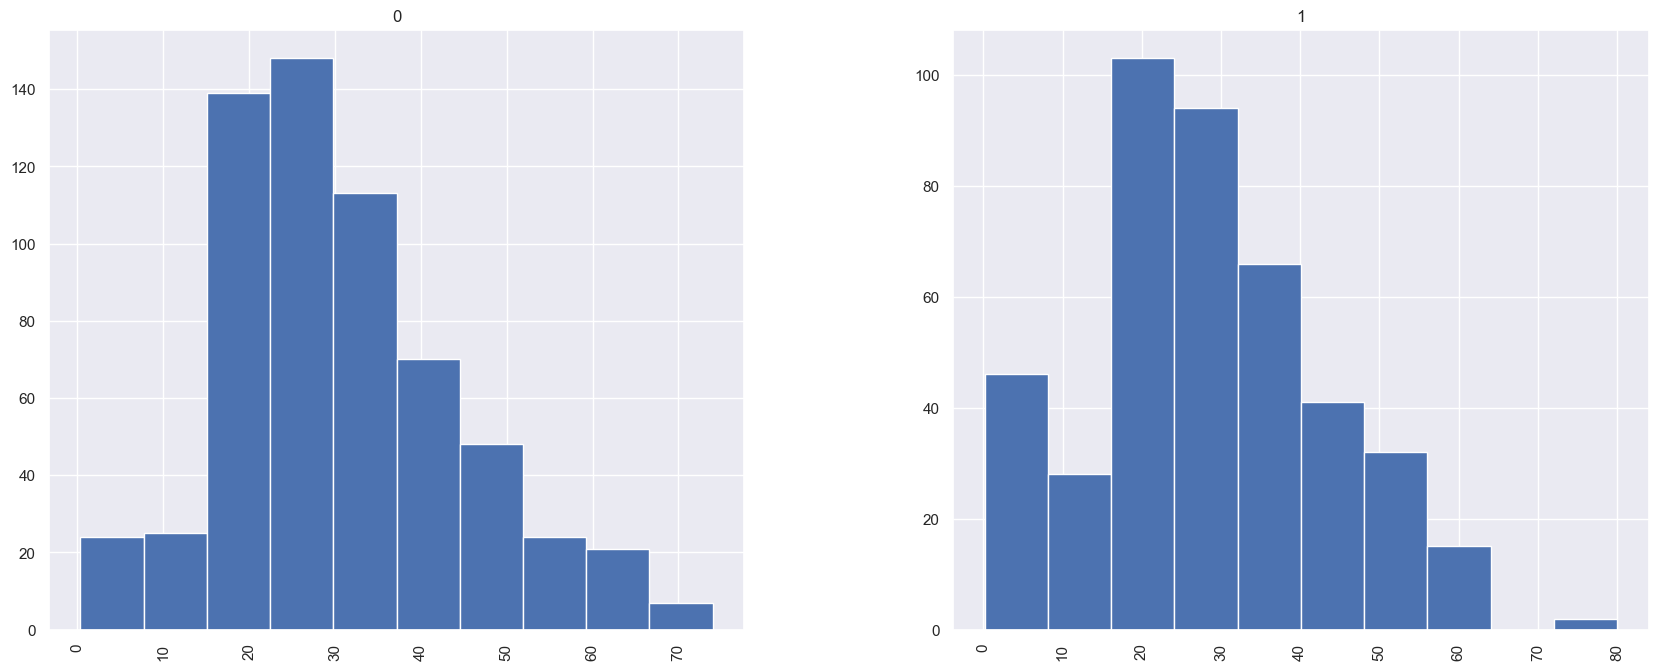

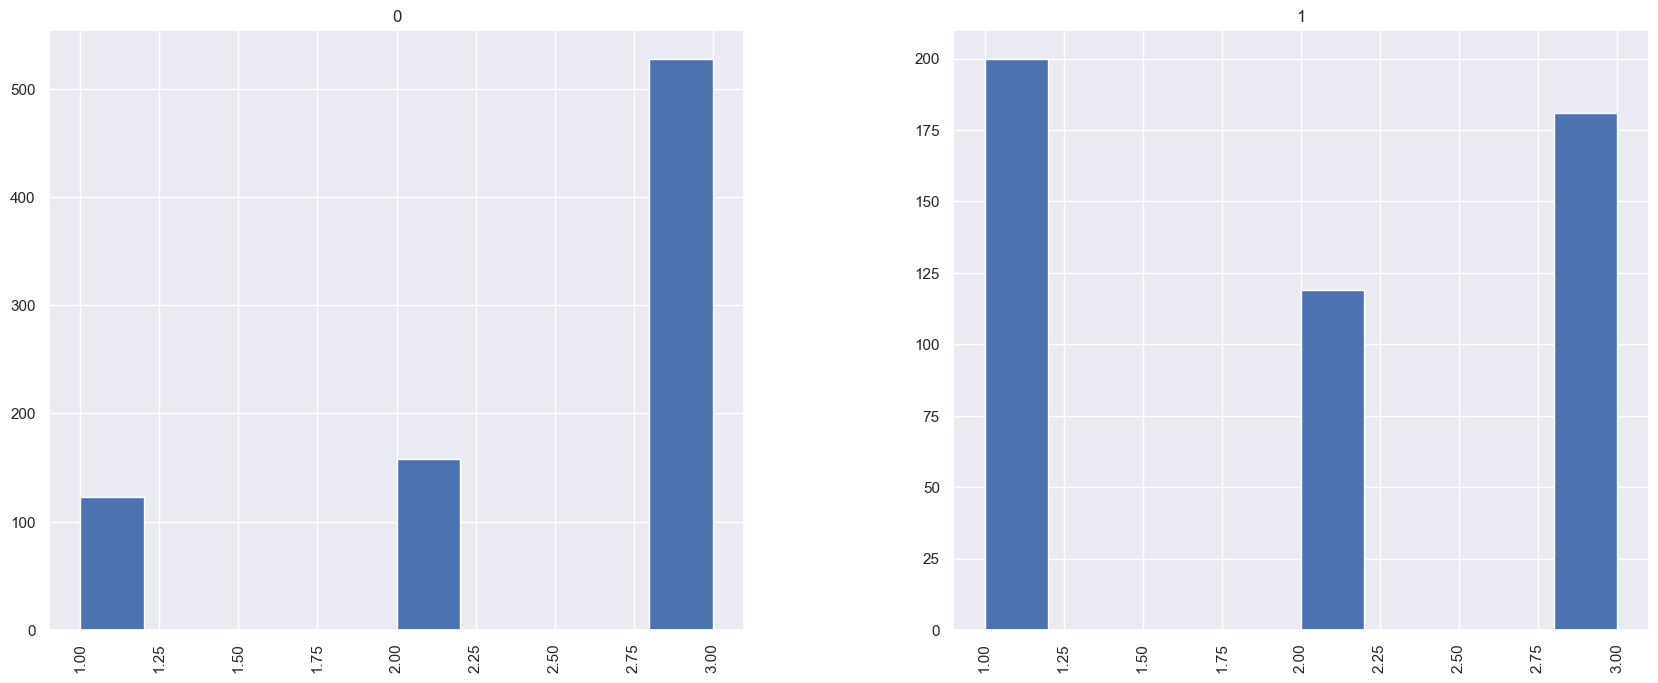

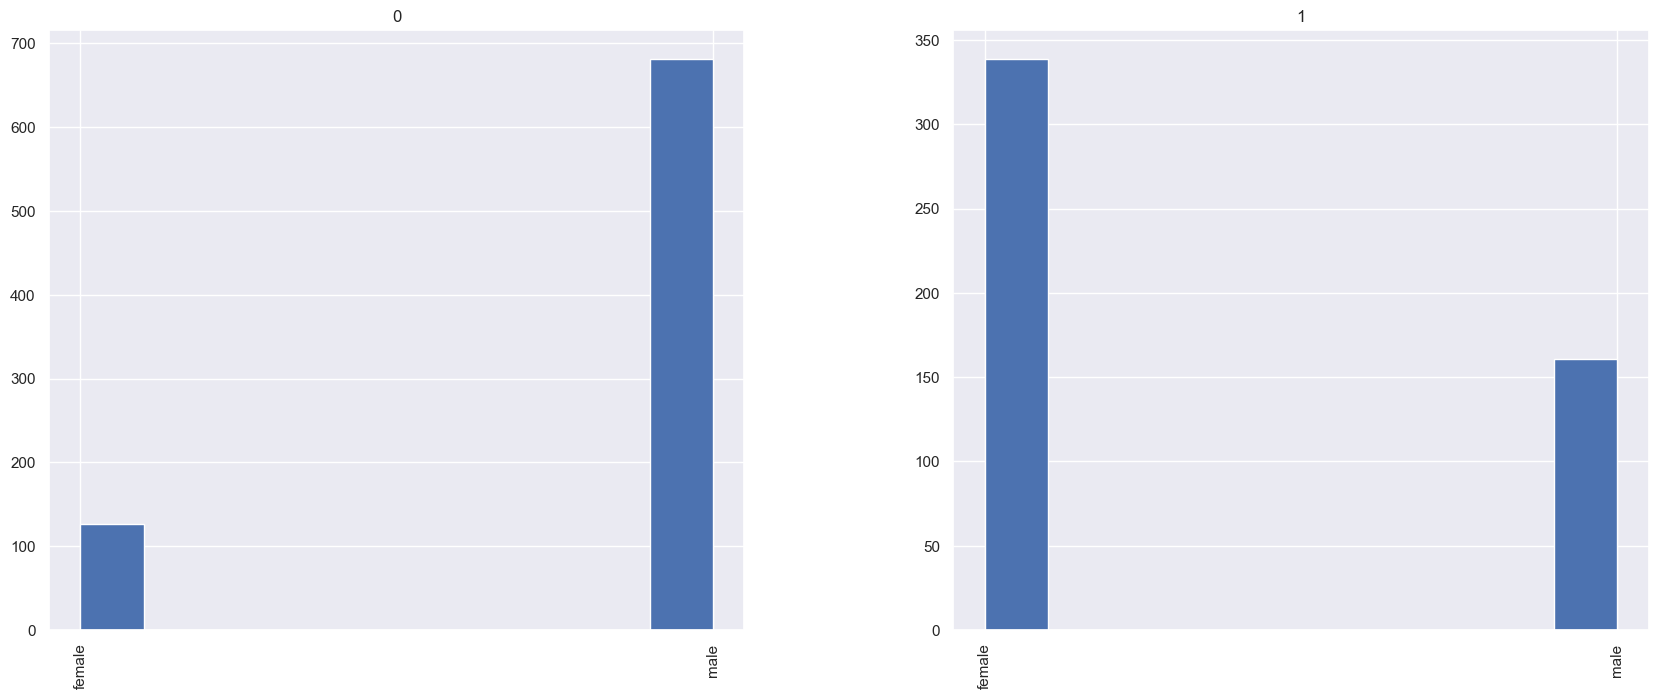

In [26]:
import matplotlib.pyplot as plt 
titanic.age.hist(bins=10,figsize=(20,8),by=titanic.survived)
titanic.pclass.hist(bins=10,figsize=(20,8),by=titanic.survived)
titanic.sex.hist(bins=10,figsize=(20,8),by=titanic.survived)

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [27]:
titanic.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [47]:
titanic_new=titanic.drop(['cabin'],axis=1)
titanic_new=titanic_new.dropna(how='any')
titanic_new=titanic_new.drop(['name','ticket'],axis=1)
titanic_new

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1301,3,male,45.5000,0,0,7.2250,C,0
1304,3,female,14.5000,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [48]:
cols=titanic_new.select_dtypes(include='object').columns
dummies=pd.get_dummies(titanic_new[cols])
titanic_new.drop(cols, axis=1, inplace=True)
model_table=pd.concat([titanic_new,dummies],axis=1)
model_table

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,True,False,False,False,True
1,1,0.9167,1,2,151.5500,1,False,True,False,False,True
2,1,2.0000,1,2,151.5500,0,True,False,False,False,True
3,1,30.0000,1,2,151.5500,0,False,True,False,False,True
4,1,25.0000,1,2,151.5500,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1301,3,45.5000,0,0,7.2250,0,False,True,True,False,False
1304,3,14.5000,1,0,14.4542,0,True,False,True,False,False
1306,3,26.5000,0,0,7.2250,0,False,True,True,False,False
1307,3,27.0000,0,0,7.2250,0,False,True,True,False,False


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

_Note, the following exercises use the housing data introduced in this week's lecture notes._

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Y=model_table.survived
X=model_table.drop(['survived'],axis=1)
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=2)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
scores_lr=cross_val_score(lr,x_train,y_train,cv=5,scoring='neg_root_mean_squared_error')
scores_dt=cross_val_score(dt,x_train,y_train,cv=5,scoring='neg_root_mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_mode

In [73]:
(scores_lr,scores_dt)

(array([-0.46429394, -0.53050648, -0.37909441, -0.4512126 , -0.49697882]),
 array([-0.48940878, -0.47701668, -0.50149477, -0.47701668, -0.53210199]))

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

In [67]:
housing=pd.read_csv('data/housing/housing.csv')
cols=housing.select_dtypes(include='object').columns
dummies=pd.get_dummies(housing[cols])
housing.drop(cols, axis=1, inplace=True)
housing_table=pd.concat([housing,dummies],axis=1)
housing_table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [68]:
housing_table.isna().sum()
housing_table.dropna(how='any',inplace=True)

In [71]:
def rmse(x):
    return -x
from sklearn.svm import SVR
svr_1=SVR(kernel='linear',C=1)
svr_2=SVR(kernel='sigmoid',C=1)
svr_3=SVR(kernel="poly",C=1)
svr_4=SVR(kernel='rbf',C=1)
Y=housing_table.median_house_value
X=housing_table.drop(['median_house_value'],axis=1)
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.8,random_state=2)
scores_1=rmse(cross_val_score(svr_1,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error'))
scores_2=rmse(cross_val_score(svr_2,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error'))
scores_3=rmse(cross_val_score(svr_3,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error'))
scores_4=rmse(cross_val_score(svr_4,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error'))
(scores_1,scores_2,scores_3,scores_4)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

(array([102606.88794771, 105105.63346814, 104778.53112226]),
 array([117258.22573972, 120845.07136326, 119181.36754328]),
 array([117224.60897018, 120881.14683746, 120052.51636251]),
 array([117247.55154251, 120841.95896028, 119163.22169787]))

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid_search=GridSearchCV(svr_1,param_grid,cv=3,scoring='neg_root_mean_squared_error',return_train_score=True)
grid_search.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/valid

GridSearchCV(cv=3, estimator=SVR(C=1, kernel='linear'),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [78]:
grid_search.best_params_

{'C': 10, 'kernel': 'rbf'}

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.